# Group Members:
     - Mayibongwe Bafoly - 1611957
     - Phutinane Donald Chipu - 2172765
     - O'neil Sithole - 1894057
     - Thabelang Ncube - 1918469
     - Pfarelo Raliphada - 1593057   

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_style('darkgrid')

In [90]:
df = pd.read_csv('DataSet.csv')

In [102]:
df.head()

,Country,TotalArea,LandArea,WaterArea,Highest.point,Maximum.elevation,Lowest.point,Minimum.elevation,Pop2023
0,Tuvalu,26.0,26.0,0.0,Unnamed location on Niulakita,5.0,South Pacific Ocean,0.0,11396
1,Marshall Islands,181.0,181.0,11673.0,Unnamed location on Likiep,10.0,North Pacific Ocean,0.0,41996
2,Bahamas,13943.0,10010.0,3870.0,Mount Alvernia on Cat Island,63.0,North Atlantic Ocean,0.0,412624
3,Gambia,11295.0,10000.0,1295.0,Unnamed point,64.0,North Atlantic Ocean,0.0,2773168
4,Nauru,21.0,21.0,0.0,Command Ridge,65.0,South Pacific Ocean,0.0,1278


(A) The country’s total area

In [92]:
X = df['TotalArea'].values.reshape(-1,1)
y = df['Maximum.elevation'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

intercept = reg.intercept_[0]
slope = reg.coef_[0][0]
print('Intercept:', intercept)
print('Slope:', slope)

new_country_total_area = 1000000
predicted_highest_point = reg.predict([[new_country_total_area]])
print('Predicted highest point for a country with 1000000 sq km of total area:', predicted_highest_point[0][0])



Intercept: 2432.298502180486
Slope: 0.0003685208481007492
Predicted highest point for a country with 1000000 sq km of total area: 2800.8193502812355


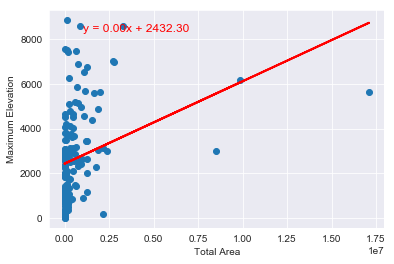

In [93]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', linewidth=2)
plt.xlabel('Total Area')
plt.ylabel('Maximum Elevation')

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.show()


In [94]:
y = df['Maximum.elevation']
x1 = df['TotalArea']

In [95]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Maximum.elevation   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     18.27
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           3.19e-05
Time:                        20:41:18   Log-Likelihood:                -1542.4
No. Observations:                 172   AIC:                             3089.
Df Residuals:                     170   BIC:                             3095.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2432.2985    154.131     15.781      0.000    2128.042    2736.555
TotalArea      0.0004   8.62e-05      4.274      0.000       0.000       0.001
==============================================================================
Omnibus:                       26.798   Durbin-Watson:                   0.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.993
Skew:                           0.997   Prob(JB):                     4.15e-08
Kurtosis:                       3.876   Cond. No.                     1.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 How significant is the slope?

$$
H_{0}: \beta = 0 \\
H_{a}: \beta \neq  0 \\
$$
$$       
\alpha = 0.05   \\     
$$
$$P-value \approx 0.000 $$

There is enough evidence to reject the Null Hypothesis and therefore, we conclude that the slope is significant at a 0.05 significance level.

Does the slope make intuitive sense?

The slope of approximately 0.0003685 represents the change in the dependent variable (Maximum Elevation) for every one-unit increase in the independent variable (Total Area), while holding all other variables constant. Since the slope is positive, it indicates that there is a positive linear relationship between Total Area and Maximum Elevation, meaning that as Total Area increases, Maximum Elevation also tends to increase. Therefore the slope does make intuitive sense. 

Does it correspond to your intuition from the scatter plot?

Yes, the results are in line with the intuition from the scatter plot. As we saw in the scatter plot, there is a positive correlation between maximum elevation and total area, and this is confirmed by the correlation coefficients obtained from the calculations.

Discuss how you’d deal with outliers?


We can you the transformation approach to transform the data using mathematical functions such as logarithms, square roots, and etc. This can help to reduce the impact of outliers and make the data more normally distributed.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

(B) The country’s lowest point

In [96]:
X = df['Minimum.elevation'].values.reshape(-1,1)
y = df['Maximum.elevation'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

print('Intercept:', reg.intercept_[0])
print('Slope:', reg.coef_[0][0])

new_country_lowest_point = 100
predicted_highest_point = reg.predict([[new_country_lowest_point]])
print('Predicted highest point for a country with a lowest point of 100 meters:', predicted_highest_point[0][0])

Intercept: 2579.3869556609334
Slope: 1.472314744911528
Predicted highest point for a country with a lowest point of 100 meters: 2726.618430152086


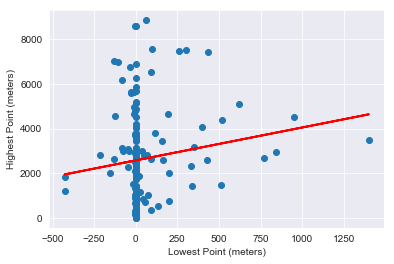

In [97]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red', linewidth=2)
plt.xlabel('Minimum Elevation')
plt.ylabel('Maximum Elevation')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.show()

In [98]:
y = df['Maximum.elevation']
x1 = df['Minimum.elevation']

In [99]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Maximum.elevation   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.574
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0604
Time:                        20:41:22   Log-Likelihood:                -1549.4
No. Observations:                 172   AIC:                             3103.
Df Residuals:                     170   BIC:                             3109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2579.3870    155.998     16.535      0.000    2271.445    2887.329
Minimum.elevation     1.4723      0.779      1.890      0.060      -0.065       3.010
==============================================================================
Omnibus:                       26.501   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.316
Skew:                           1.017   Prob(JB):                     5.83e-08
Kurtosis:                       3.713   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 How significant is the slope?

$$
H_{0}: \beta = 0 \\
H_{a}: \beta \neq  0 \\
$$
$$       
\alpha = 0.05   \\     
$$
$$P-value \approx 0.060 $$

We fail to reject the Null Hypothesis and therefore, we conclude that the slope is not significant at a 0.05 significance level.

Does the slope make intuitive sense?

No, It is not possible to make any conclusive statement about the slope of the regression line. It is necessary to consider other variables and factors that may impact the relationship between maximum and minimum elevations in order to determine if the slope makes intuitive sense.

Does it correspond to your intuition from the scatter plot?

No, The slope between Maximum Elevation and Minimum Elevation in the scatter plot shows a positive relationship. 

Discuss how you’d deal with outliers?

We would need to transform the data to deal with the negative values, a transformation can be applied to the data to make it more symmetric. For example, the logarithm or square root transformation can be used to bring the data closer to a normal distribution.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Several Variable regression/ Use the techniques of multiple variable regression to fix a model using
some of the variables given. For example, the lowest point, the total area, the land and water area and
the population. Discuss why you left out certain variables and left others in.


In [115]:
X = df[['TotalArea', 'LandArea', 'WaterArea', 'Minimum.elevation']]
y = df['Maximum.elevation']

reg = LinearRegression()
reg.fit(X, y)

coefficients = dict(zip(X.columns, reg.coef_))
print('Intercept:', reg.intercept_)
print('Coefficients:', coefficients)

new_country_values = [1000000, 500000, 500000, 5000000]
predicted_highest_point = reg.predict([new_country_values])
print('Predicted highest point for a country with given values of independent variables:', predicted_highest_point[0])


Intercept: 2337.8523525653413
Coefficients: {'TotalArea': 0.26776436342185217, 'LandArea': -0.26755029694838545, 'WaterArea': -0.26350385932960385, 'Minimum.elevation': 1.7779108444941447}
Predicted highest point for a country with given values of independent variables: 8894129.360106146


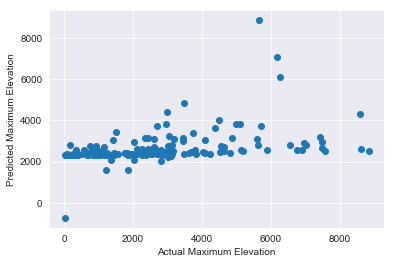

In [129]:
plt.scatter(y, reg.predict(X))
plt.xlabel('Actual Maximum Elevation')
plt.ylabel('Predicted Maximum Elevation')
plt.show()

In [117]:

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      Maximum.elevation   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     8.596
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           2.48e-06
Time:                        22:28:48   Log-Likelihood:                -1535.1
No. Observations:                 172   AIC:                             3080.
Df Residuals:                     167   BIC:                             3096.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2337.8524    155.43

We left out some variables such as Lowest.point and Pop2023 because they may not have a significant effect on the variation of Maximum Elevation, the ones we let in have a significant effect on the variation of Maximum Elevation.

Overall, if you had to accurately predict the maximum elevation, which model (from the above ones)
would you choose and why?

 Several Variable regression - It is necessary to consider other variables and factors that may impact the maximum elevations.